# Global Warming Analysis and Visualizations

Overview :

The rising average temperature of Earth's climate system, called global warming, is driving changes in rainfall patterns, extreme weather, arrival of seasons, and more. Collectively, global warming and its effects are known as climate change. While there have been prehistoric periods of global warming, observed changes since the mid-20th century have been unprecedented in rate and scale. So a dataset on the temperature of major cities of the world will help analyze the same. Also weather information is helpful for a lot of data science tasks like sales forecasting, logistics etc. The data is available for research and non-commercial purposes only.

license :
http://academic.udayton.edu/kissock/http/Weather/default.htm

Content :
Daily level average temperature values is present in city_temperature.csv file

Acknowledgements :
University of Dayton for making this dataset available in the first place!

## Data Preparing

### 1.Importing the libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

plt.style.use('seaborn-whitegrid')
# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### 2.Cleaning the Data

In [4]:
df=pd.read_csv('city_temperature.csv')
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [12]:
# Check for missing values

df.isnull().sum()


Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [13]:
# Seeing the unique values of Year we see that there are a few values where Year=201 and 200. We will drop them

# Remove these records
df=df.drop(df[(df['Year']==201) | (df['Year']==200)].index)
df['Year'].value_counts()

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
Name: Year, dtype: int64

### 3.Perforing Exploratory Data Analysis

Text(0, 0.5, 'Average Temperature')

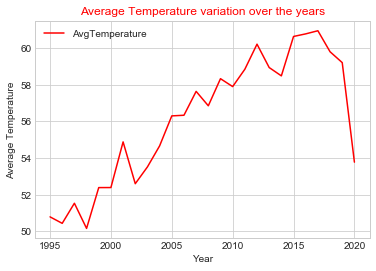

In [16]:
# Seeing the movement of average mean temperature over the years for the entire planet

pd.pivot_table(df,index=['Year'],values=['AvgTemperature'],aggfunc=np.mean).plot(kind='line',color='red')
plt.title("Average Temperature variation over the years", loc='center', fontsize=12, fontweight=0, color='red')
plt.xlabel("Year")
plt.ylabel("Average Temperature")


#### We can see that the average temperature across the world has risen by around 3 degrees (51 degrees in 1995 to 54 degrees in 2020)

Text(0, 0.5, 'Average Temperature, Fahrenheit')

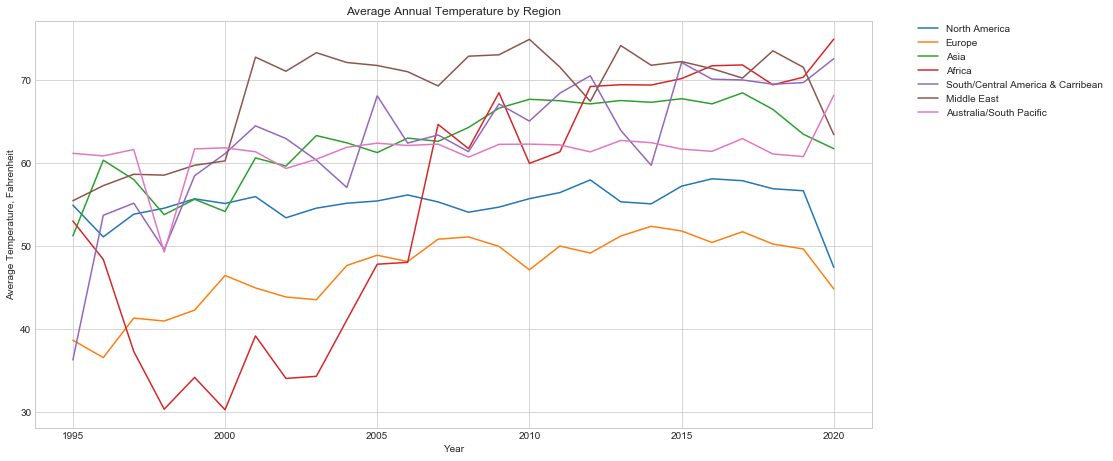

In [17]:
regions = ['North America', 'Europe', 'Asia', 'Africa', 'South/Central America & Carribean', 'Middle East', 'Australia/South Pacific']

# Loop through each region and plot average temperature
plt.figure(figsize=(15,7.5))
for region in regions:
    temp = df[df['Region']== region]
    temp = temp.groupby("Year")["AvgTemperature"].mean()
    a = temp
    plt.plot(a)
    
plt.legend(regions, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average Annual Temperature by Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature, Fahrenheit')

Text(0.5, 1.0, 'Increase in Average Temperature by Region')

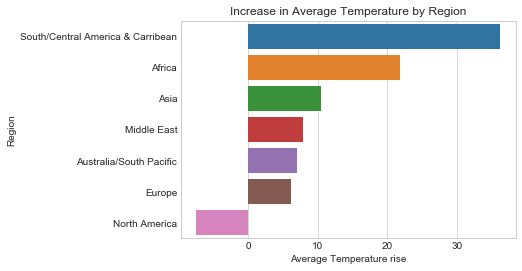

In [18]:

avg_temperature={}
keys=df['Region'].unique()
for region in df.Region.unique():
    avg_temperature[region]=df[(df['Region']==region)&(df['Year']==2020)]['AvgTemperature'].mean()-df[(df['Region']==region)&(df['Year']==1995)]['AvgTemperature'].mean()
avg_temperature_rise=pd.DataFrame(list(avg_temperature.items()),columns=['Region','Average Temperature rise'])

sns.barplot(x='Average Temperature rise',y='Region',data=avg_temperature_rise.sort_values(by='Average Temperature rise',ascending=False)).set_title('Increase in Average Temperature by Region')

#### We can clearly see that South/Central America & Carribbean has seen the most temperature rises over a period of 25 years, while North America has seen a negative rise in temperatures

Text(0.5, 1.0, 'Top 10 countries with least increase in Average Temperature')

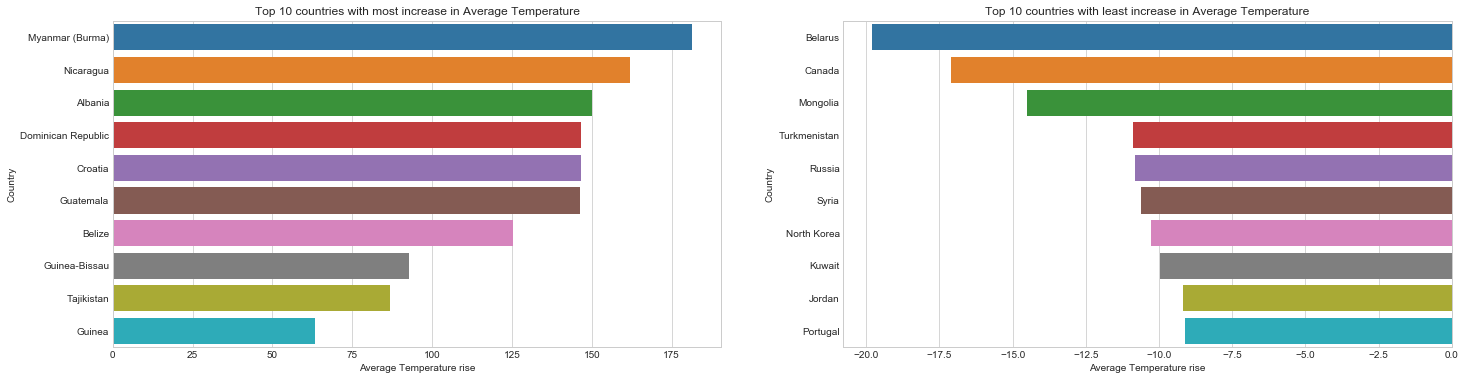

In [19]:
# Seeing the countries with the highest and lowest temperature rises from 1995 to 2020

avg_temperature_country={}
keys=df['Country'].unique()
for country in df.Country.unique():
    avg_temperature_country[country]=df[(df['Country']==country)&(df['Year']==2020)]['AvgTemperature'].mean()-df[(df['Country']==country)&(df['Year']==1995)]['AvgTemperature'].mean()
avg_temperature_rise_co=pd.DataFrame(list(avg_temperature_country.items()),columns=['Country','Average Temperature rise'])


fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='Average Temperature rise',y='Country',ax=ax[0],data=avg_temperature_rise_co.sort_values(by='Average Temperature rise',ascending=False).head(10)).set_title('Top 10 countries with most increase in Average Temperature')
sns.barplot(x='Average Temperature rise',y='Country',ax=ax[1],data=avg_temperature_rise_co.sort_values(by='Average Temperature rise',ascending=True).head(10)).set_title('Top 10 countries with least increase in Average Temperature')

Text(0.5, 1.0, 'Top 10 cities with least increase in Average Temperature')

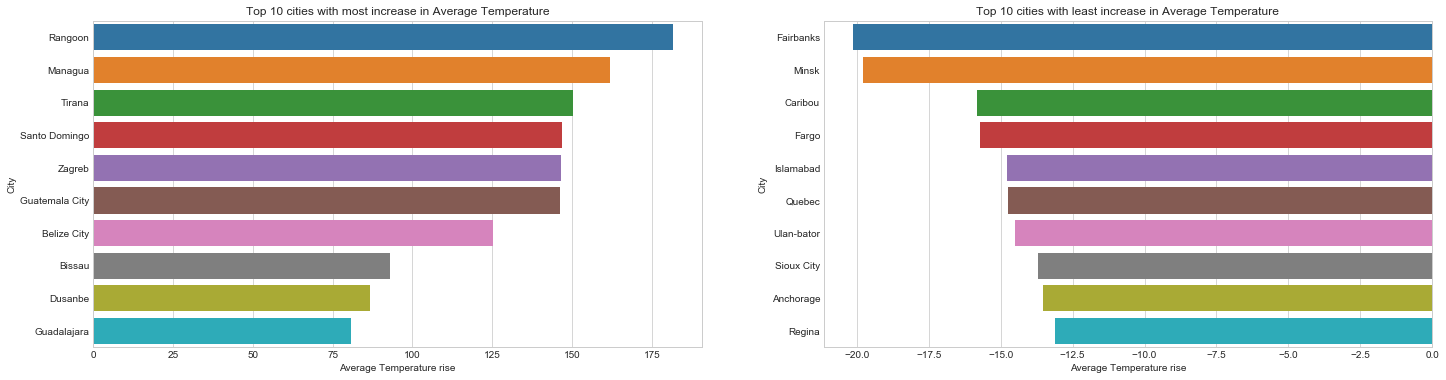

In [20]:
# Seeing the cities with the highest and lowest temperature rises from 1995 to 2020

avg_temperature_city={}
keys=df['City'].unique()
for city in df.City.unique():
    avg_temperature_city[city]=df[(df['City']==city)&(df['Year']==2020)]['AvgTemperature'].mean()-df[(df['City']==city)&(df['Year']==1995)]['AvgTemperature'].mean()
avg_temperature_rise_ci=pd.DataFrame(list(avg_temperature_city.items()),columns=['City','Average Temperature rise'])


fig, ax =plt.subplots(1,2,figsize=(24, 6))
sns.barplot(x='Average Temperature rise',y='City',ax=ax[0],data=avg_temperature_rise_ci.sort_values(by='Average Temperature rise',ascending=False).head(10)).set_title('Top 10 cities with most increase in Average Temperature')
sns.barplot(x='Average Temperature rise',y='City',ax=ax[1],data=avg_temperature_rise_ci.sort_values(by='Average Temperature rise',ascending=True).head(10)).set_title('Top 10 cities with least increase in Average Temperature')

# Australia's Temperature Analysis

In [22]:
## Isolating India data set

df_aus = df[df.Country == 'Australia'].copy()
df_aus.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
567781,Australia/South Pacific,Australia,NaN,Brisbane,1,1,1995,76.1
567782,Australia/South Pacific,Australia,NaN,Brisbane,1,2,1995,78.3
567783,Australia/South Pacific,Australia,NaN,Brisbane,1,3,1995,78.6
567784,Australia/South Pacific,Australia,NaN,Brisbane,1,4,1995,78.6
567785,Australia/South Pacific,Australia,NaN,Brisbane,1,5,1995,78.3


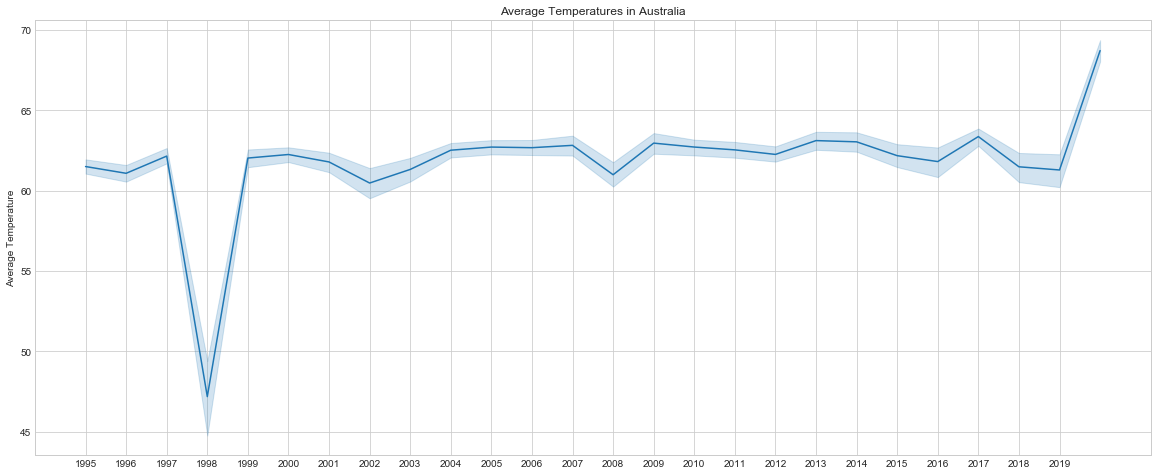

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'Year', y = 'AvgTemperature', data = df_aus , palette='hsv')
plt.title('Average Temperatures in Australia')
plt.ylabel('Average Temperature')
plt.xlabel('')
plt.xticks(range(1995,2020))
plt.show()

In [25]:

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

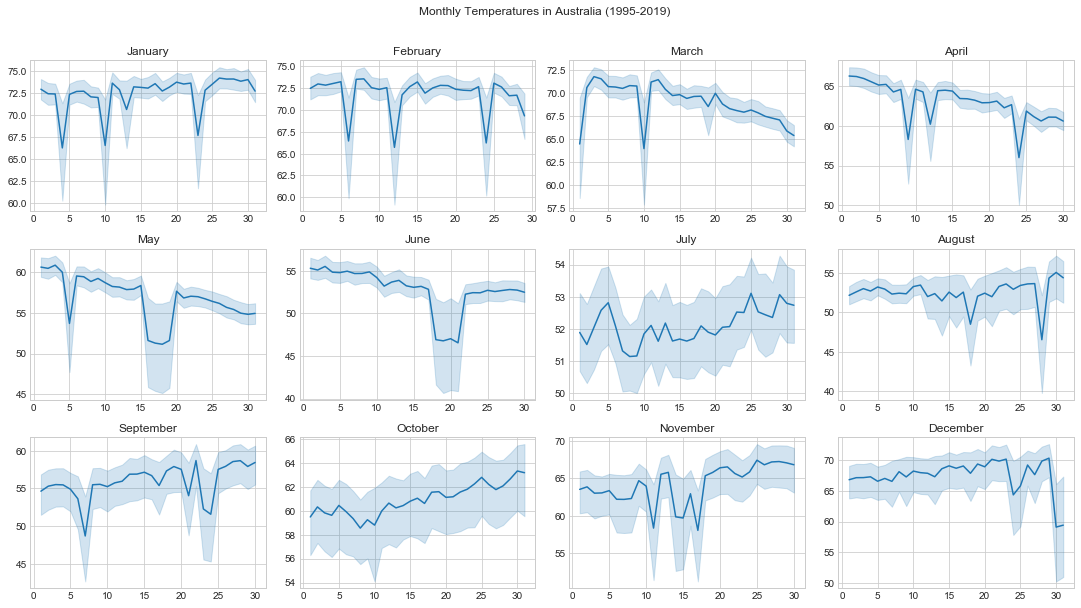

In [27]:
# Seeing the monthly variation of temperature in Australia over time
fig = plt.subplots(3,4, figsize = (15,8))
for i in range(1,13): 
    ax = plt.subplot(3, 4, i)
    sns.lineplot(x = 'Day', y = 'AvgTemperature', data = df_aus[df_aus.Month == i] , palette='hsv')
    ax.title.set_text(months[i-1])
    #ax.set_ylim((-5,25))
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.suptitle('Monthly Temperatures in Australia (1995-2019)', y = 1.05)
#plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show();

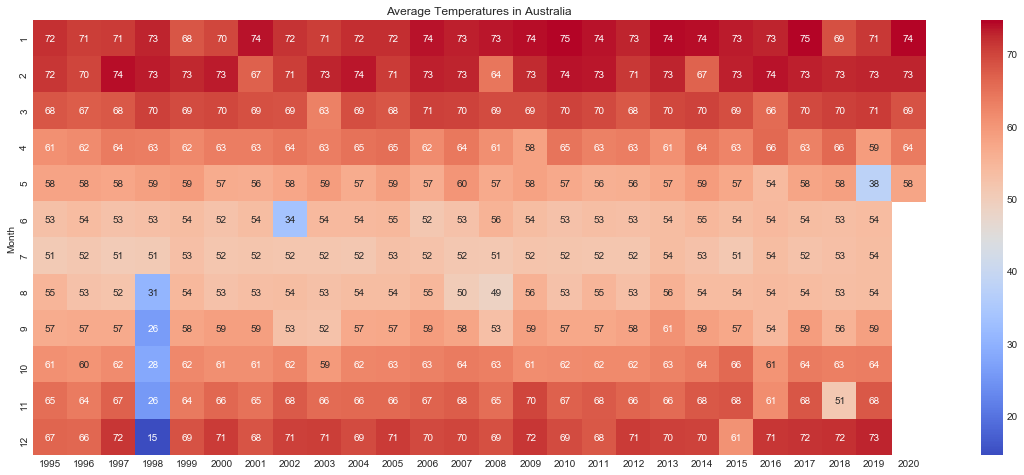

In [29]:
## Monthly average temperature in Australia

india_pivoted = pd.pivot_table(data= df_aus,index='Month',values='AvgTemperature',columns='Year')
plt.figure(figsize=(20, 8))
sns.heatmap(data = india_pivoted, cmap='coolwarm', annot = True)
plt.ylabel('Month')
plt.xlabel('')
plt.title('Average Temperatures in Australia')
plt.show();